In [10]:
import nest_py_interface
import numpy as np
import matplotlib.pyplot as plt

npw = nest_py_interface.nest_py_wrapper_std()
npw.print_result_or_not(0)
numSims = 100
exposure = 5600 * 1000 * numSims
results = npw.testNEST([str(exposure),'8B','0','4' ,'310', '-1', '1'])
s1_hit = np.absolute(results.s1_n_hits)
s2_RAphd = np.absolute(results.s2_raw_area_phd)

zpos = np.array(results.pos_z_mm)
#z positions with only s1 cut
zS1Cut = zpos[s1_hit >= 3]
edges = np.linspace(min(zS1Cut), max(zS1Cut), 20, endpoint = True)
#what is happening here?
#histogram of s1 only cut
histS1data, whatAreBins = np.histogram(zS1Cut, edges)

zS1S2Cut = zpos[(s1_hit >= 3) & (s2_RAphd >= 415)]
#histogram of s1 only cut
histS1S2data = np.histogram(zS1S2Cut, edges)[0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater_equal


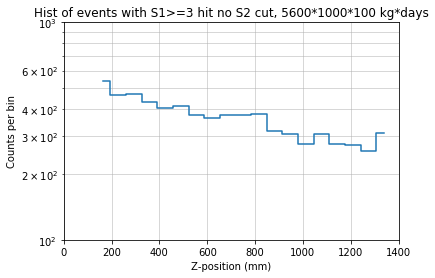

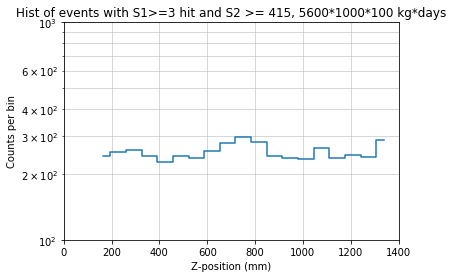

In [11]:
edge_centers = (edges[:-1] + edges[1:]) / 2

#no cut plot
plt.figure(0)
plt.step(edge_centers, histS1data,where = 'mid')
plt.xlabel('Z-position (mm)')
plt.ylabel('Counts per bin')
plt.title('Hist of events with S1>=3 hit no S2 cut, 5600*1000*100 kg*days')
plt.yscale('log')
plt.ylim([numSims, 10*numSims])
plt.xlim([0,1400])
plt.grid(True,which='both',linewidth=.5)

#s2 cut plot
plt.figure(1)
plt.step(edge_centers, histS1S2data,where = 'mid')
plt.xlabel('Z-position (mm)')
plt.ylabel('Counts per bin')
plt.title('Hist of events with S1>=3 hit and S2 >= 415, 5600*1000*100 kg*days')
plt.yscale('log')
plt.ylim([numSims, 10*numSims])
plt.xlim([0,1400])
plt.grid(True,which='both',linewidth=.5)
